<a href="https://colab.research.google.com/github/Manishgupta-coder/HandwrittenCharacterRecognitionUsingCNN/blob/main/Major_Project_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [2]:
data= tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

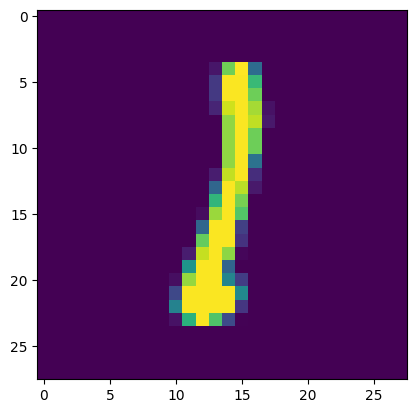

In [6]:
plt.imshow(x_train[152])


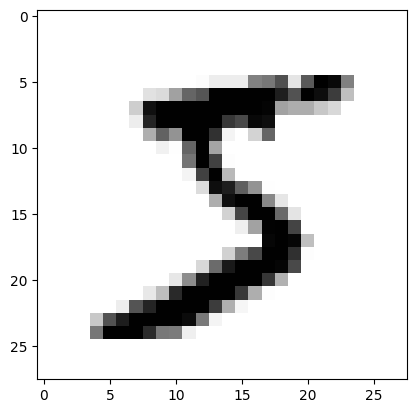

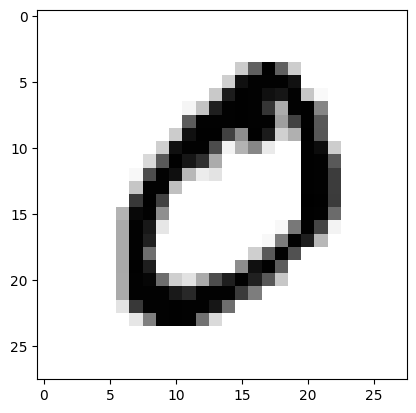

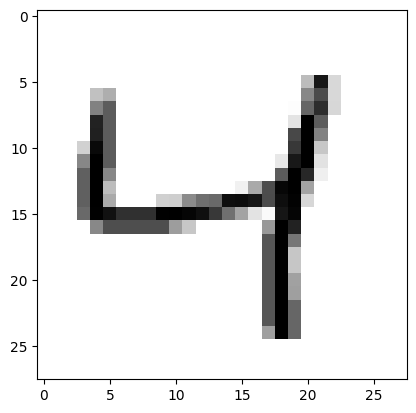

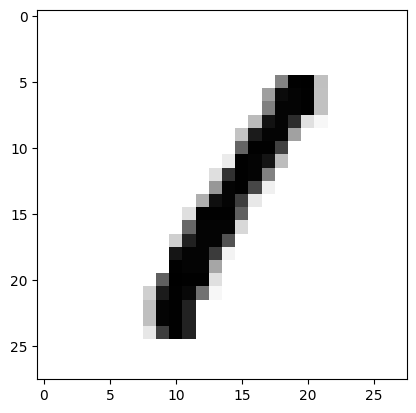

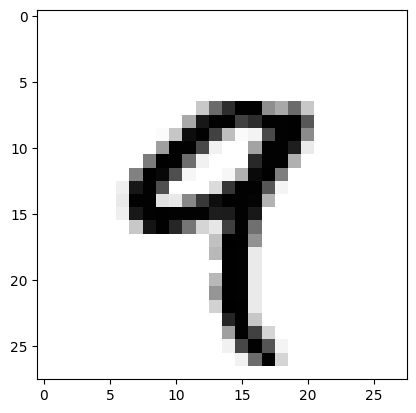

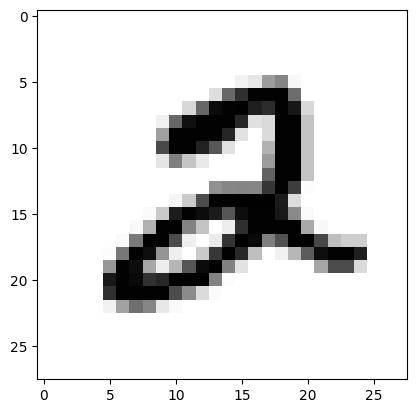

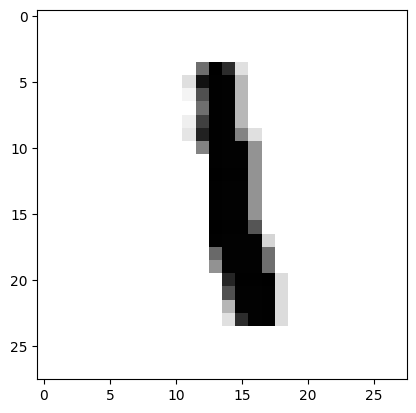

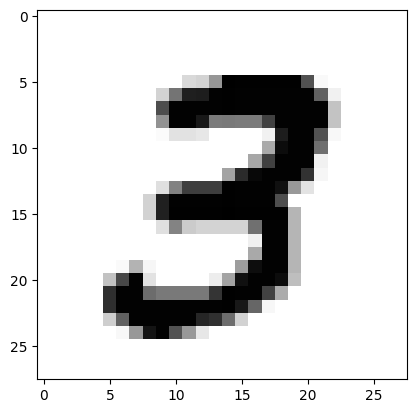

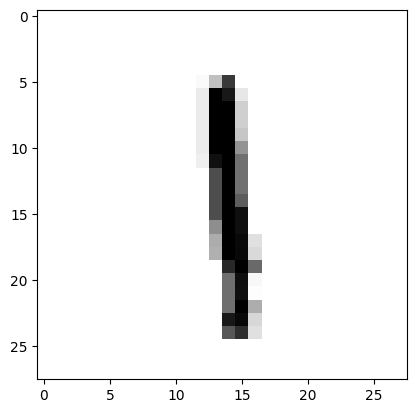

In [7]:
from matplotlib import pyplot
i=456
for i in range(9):
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  pyplot.show()



In [8]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [9]:
print(y_train[0])

5


In [10]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training Samples dimension",x_trainr.shape)
print("Testing Samples dimension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [12]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [14]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [15]:
print("Total Testung Samples = ",len(x_testr))

Total Testung Samples =  10000


In [16]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [17]:
history=model.fit(x_trainr,y_train,epochs=10,validation_data=(x_testr,y_test))

Epoch 1/10
1875/1875 [==============================] - 21s 5ms/step - loss: 0.2922 - accuracy: 0.9161 - val_loss: 0.0970 - val_accuracy: 0.9725
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0965 - accuracy: 0.9713 - val_loss: 0.0870 - val_accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0729 - accuracy: 0.9781 - val_loss: 0.0995 - val_accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0580 - accuracy: 0.9827 - val_loss: 0.0601 - val_accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0520 - accuracy: 0.9843 - val_loss: 0.0602 - val_accuracy: 0.9827
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0458 - accuracy: 0.9862 - val_loss: 0.0622 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0397 - accuracy: 0.9882 - val_loss: 0.0671 - val_accuracy

In [18]:
test_loss , test_acc = model.evaluate(x_testr,y_test)
print("Test Loss on 313 test samples = ",test_loss)
print("Validation Accuracy on 313 test samples = ",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0648 - accuracy: 0.9862
Test Loss on 313 test samples =  0.06479974091053009
Validation Accuracy on 313 test samples =  0.9861999750137329


In [19]:
predictions=model.predict([x_testr])

313/313 [==============================] - 1s 2ms/step


In [20]:
print(predictions[0])


[8.4294052e-13 2.8570635e-09 6.4567203e-08 7.5185804e-12 2.7513041e-08
 1.0621150e-12 1.7024610e-13 9.9999988e-01 8.1243770e-12 7.1125150e-09]


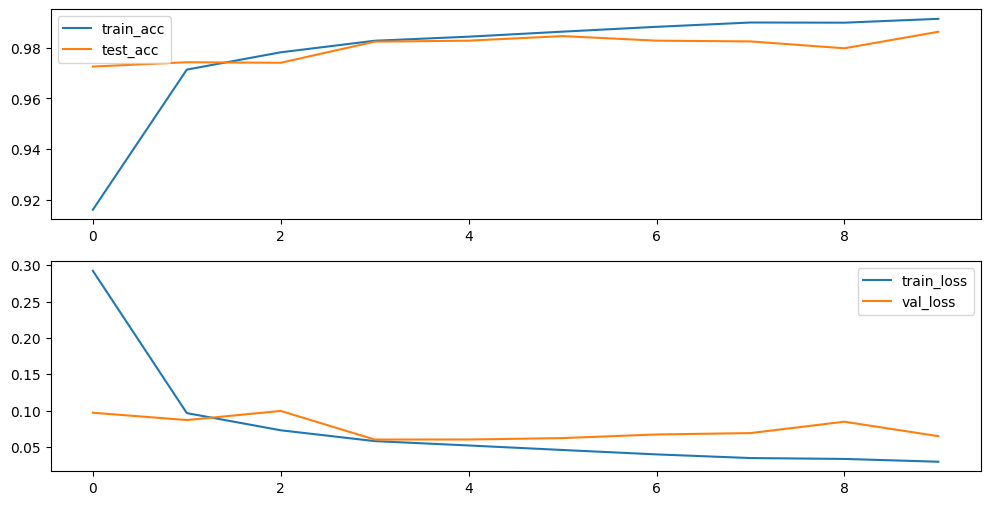

In [21]:
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'], label="train_acc")
plt.plot(history.history['val_accuracy'], label = "test_acc")
plt.legend()
plt.subplot(2,1,2)
plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.legend()

In [22]:
print(np.argmax(predictions[5]))

1


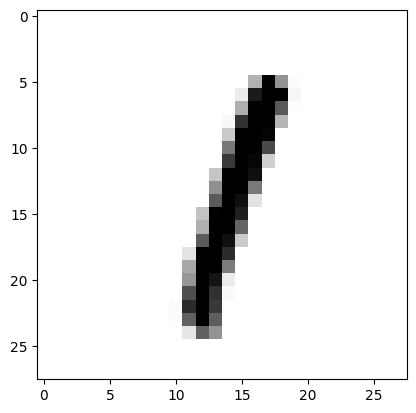

In [23]:
plt.imshow(x_test[5],cmap=plt.cm.binary)

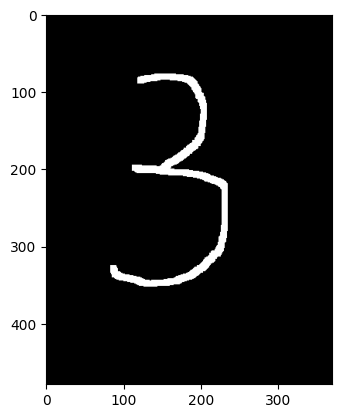

In [24]:
img=cv2.imread('three.png')
plt.imshow(img)
img.shape
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


In [25]:
gray.shape

(479, 371)

In [26]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [27]:
resized.shape

(28, 28)

In [28]:
newimg=np.array(resized).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [29]:
pred=model.predict(newimg)
print(np.argmax(pred))

1/1 [==============================] - 0s 235ms/step
3
